# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
api_key = '7903b17145a7fb49cd3e90ee51bf915f'


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | vennesla
Processing Record 3 of Set 1 | severo-yeniseyskiy
Processing Record 4 of Set 1 | molochnoye
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | christchurch
Processing Record 7 of Set 1 | borogontsy
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | ahau
City not found. Skipping...
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | beitbridge
Processing Record 13 of Set 1 | solleftea
Processing Record 14 of Set 1 | jesup
Processing Record 15 of Set 1 | kalevala
Processing Record 16 of Set 1 | fereydunshahr
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | raja
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | kupang
Processing 

Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | la'ie
Processing Record 41 of Set 4 | newman
Processing Record 42 of Set 4 | caister-on-sea
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | rulenge
Processing Record 46 of Set 4 | obsharovka
Processing Record 47 of Set 4 | mejit
Processing Record 48 of Set 4 | monte alegre
Processing Record 49 of Set 4 | trashigang
Processing Record 0 of Set 5 | zeya
Processing Record 1 of Set 5 | minas de marcona
Processing Record 2 of Set 5 | baiti
Processing Record 3 of Set 5 | letlhakane
Processing Record 4 of Set 5 | awjilah
Processing Record 5 of Set 5 | tolanaro
Processing Record 6 of Set 5 | wenling
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | konarka
Processing Record 9 of Set 5 | rioja
Processing Record 10 of Set 5 | coahuayana de hidalgo
Processing Record 11 of Set 5 | kamiiso
Processing Record 12 of Set 5 | nova sintra
Processing

Processing Record 30 of Set 8 | hammerfest
Processing Record 31 of Set 8 | dawesville
Processing Record 32 of Set 8 | kristiansund
Processing Record 33 of Set 8 | tobelo
Processing Record 34 of Set 8 | torghay
Processing Record 35 of Set 8 | murzuq
Processing Record 36 of Set 8 | barclayville
Processing Record 37 of Set 8 | hachinohe
Processing Record 38 of Set 8 | cole harbour
Processing Record 39 of Set 8 | nuku'alofa
Processing Record 40 of Set 8 | novokazalinsk
City not found. Skipping...
Processing Record 41 of Set 8 | mili
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | smithers
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | dalandzadgad
Processing Record 47 of Set 8 | pionerskiy
Processing Record 48 of Set 8 | khovd
Processing Record 49 of Set 8 | villa luvianos
Processing Record 0 of Set 9 | labuan bajo
Processing Record 1 of Set 9 | howrah
Processing Record 2 of Set 9 | xai-xai
Process

Processing Record 19 of Set 12 | emmett
Processing Record 20 of Set 12 | ryotsu-minato
Processing Record 21 of Set 12 | korla
Processing Record 22 of Set 12 | weno
Processing Record 23 of Set 12 | sibolga
Processing Record 24 of Set 12 | felege neway
Processing Record 25 of Set 12 | gillette
Processing Record 26 of Set 12 | lammi
Processing Record 27 of Set 12 | gumia
Processing Record 28 of Set 12 | harstad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
print(city_data)

[{'City': 'wailua homesteads', 'Lat': 22.0669, 'Lng': -159.378, 'Max Temp': 23.24, 'Humidity': 74, 'Cloudiness': 100, 'Wind Speed': 9.26, 'Country': 'US', 'Date': 1709005006}, {'City': 'vennesla', 'Lat': 58.2694, 'Lng': 7.9741, 'Max Temp': -4.03, 'Humidity': 93, 'Cloudiness': 24, 'Wind Speed': 2.06, 'Country': 'NO', 'Date': 1709005007}, {'City': 'severo-yeniseyskiy', 'Lat': 60.3725, 'Lng': 93.0408, 'Max Temp': -19.12, 'Humidity': 95, 'Cloudiness': 97, 'Wind Speed': 0.89, 'Country': 'RU', 'Date': 1709005007}, {'City': 'molochnoye', 'Lat': 59.2917, 'Lng': 39.6787, 'Max Temp': 0.18, 'Humidity': 94, 'Cloudiness': 100, 'Wind Speed': 5.36, 'Country': 'RU', 'Date': 1709005007}, {'City': 'albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 3.18, 'Humidity': 78, 'Cloudiness': 97, 'Wind Speed': 0.45, 'Country': 'US', 'Date': 1709005007}, {'City': 'christchurch', 'Lat': -43.5333, 'Lng': 172.6333, 'Max Temp': 19.95, 'Humidity': 74, 'Cloudiness': 75, 'Wind Speed': 7.2, 'Country': 'NZ', 'Date': 17

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,23.24,74,100,9.26,US,1709005006
1,vennesla,58.2694,7.9741,-4.03,93,24,2.06,NO,1709005007
2,severo-yeniseyskiy,60.3725,93.0408,-19.12,95,97,0.89,RU,1709005007
3,molochnoye,59.2917,39.6787,0.18,94,100,5.36,RU,1709005007
4,albany,42.6001,-73.9662,3.18,78,97,0.45,US,1709005007


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.24,74,100,9.26,US,1709005006
1,vennesla,58.2694,7.9741,-4.03,93,24,2.06,NO,1709005007
2,severo-yeniseyskiy,60.3725,93.0408,-19.12,95,97,0.89,RU,1709005007
3,molochnoye,59.2917,39.6787,0.18,94,100,5.36,RU,1709005007
4,albany,42.6001,-73.9662,3.18,78,97,0.45,US,1709005007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

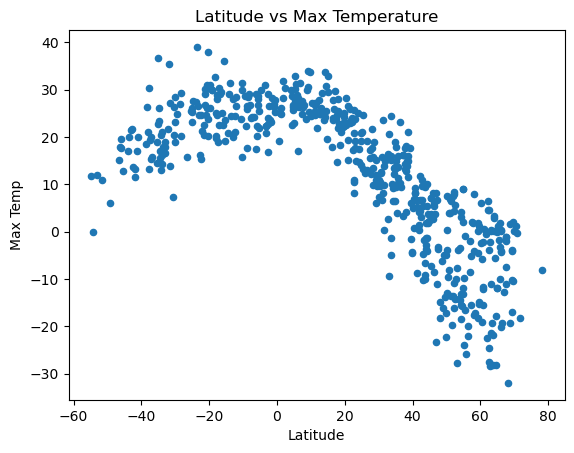

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

import matplotlib.pyplot as plt

# Assuming city_data_df is your DataFrame containing weather data
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', title='Latitude vs Max Temperature')


# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

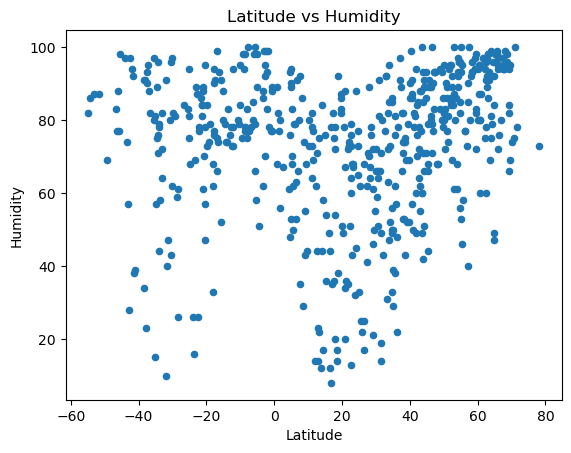

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

city_data_df.plot(kind='scatter', x='Lat', y='Humidity', title='Latitude vs Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

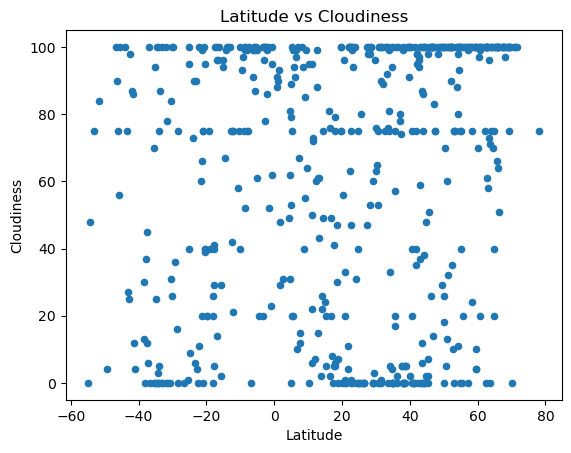

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', title='Latitude vs Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

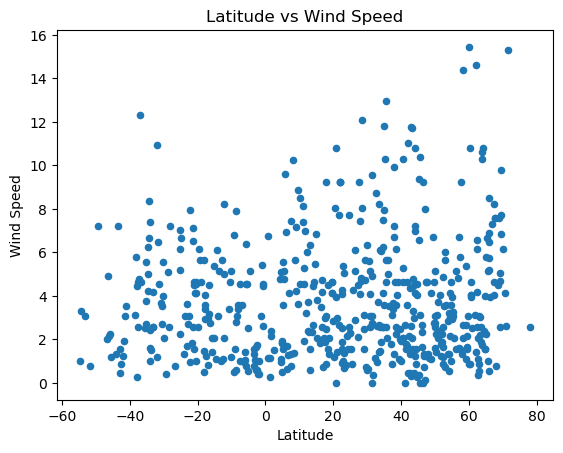

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', title='Latitude vs Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


def scatter_plot_with_regression(df, x_col, y_col):
    
    df.plot(kind='scatter', x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)

    # Compute linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])

    # Plot the regression line
    plt.plot(df[x_col], slope * df[x_col] + intercept, color='red')

    # Display equation
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(df[x_col].min(), df[y_col].max(), equation, color='red')

    # Display title & r-value
    title = f'{x_col} vs {y_col} (r-value = {r_value:.2f})'
    plt.title(title)

    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.24,74,100,9.26,US,1709005006
1,vennesla,58.2694,7.9741,-4.03,93,24,2.06,NO,1709005007
2,severo-yeniseyskiy,60.3725,93.0408,-19.12,95,97,0.89,RU,1709005007
3,molochnoye,59.2917,39.6787,0.18,94,100,5.36,RU,1709005007
4,albany,42.6001,-73.9662,3.18,78,97,0.45,US,1709005007


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,christchurch,-43.5333,172.6333,19.95,74,75,7.20,NZ,1709004901
9,invercargill,-46.4000,168.3500,17.79,77,90,4.92,NZ,1709005009
10,beitbridge,-22.2167,30.0000,21.26,78,100,7.96,ZW,1709005009
15,port-aux-francais,-49.3500,70.2167,6.06,69,4,7.23,TF,1709005010
18,edinburgh of the seven seas,-37.0676,-12.3116,15.28,88,100,12.30,SH,1709005011


###  Temperature vs. Latitude Linear Regression Plot

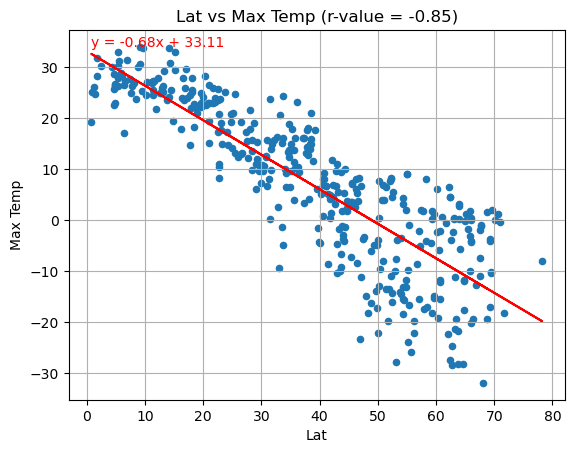

In [23]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(northern_hemi_df,'Lat','Max Temp')

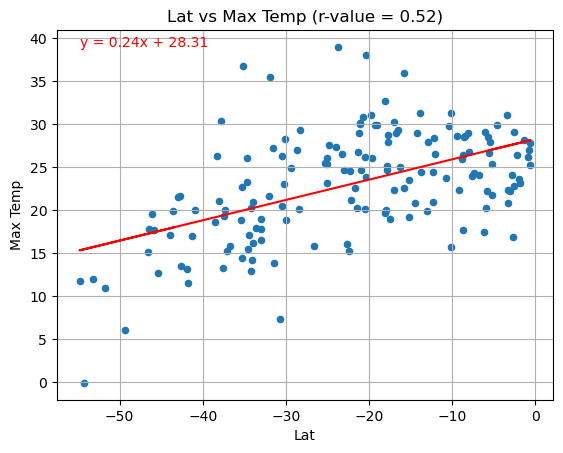

In [24]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

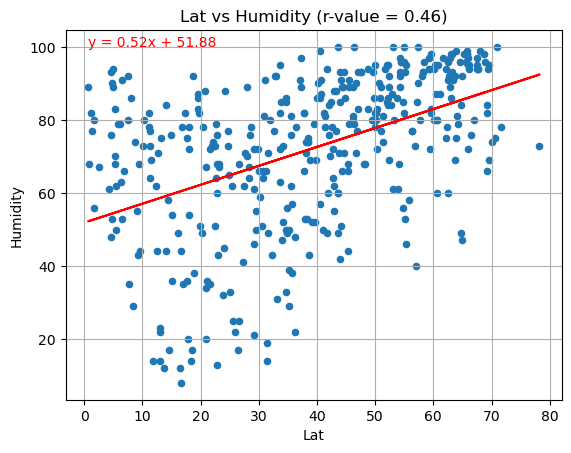

In [22]:
# Northern Hemisphere
# YOUR CODE HERE

scatter_plot_with_regression(northern_hemi_df,'Lat','Humidity')

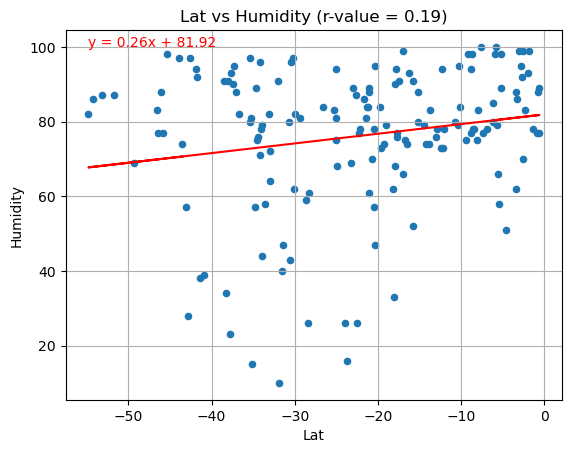

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

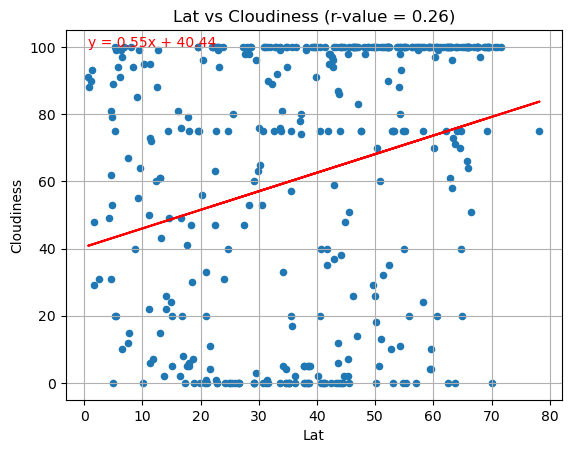

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(northern_hemi_df,'Lat','Cloudiness')

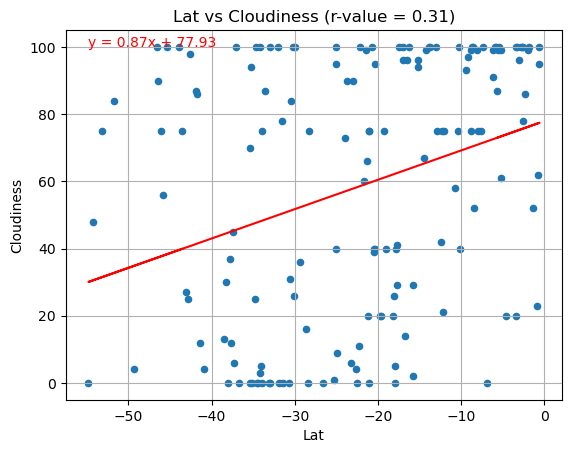

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

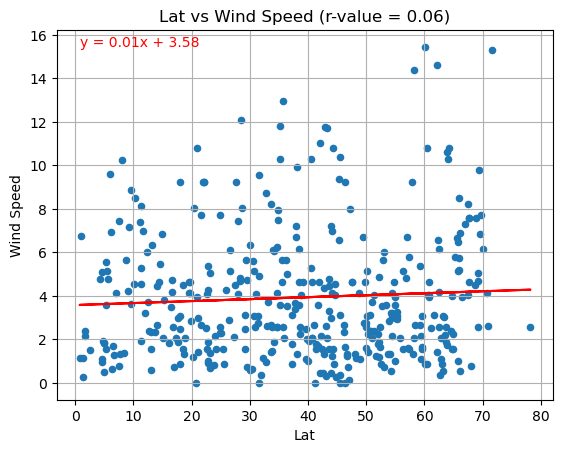

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(northern_hemi_df,'Lat','Wind Speed')

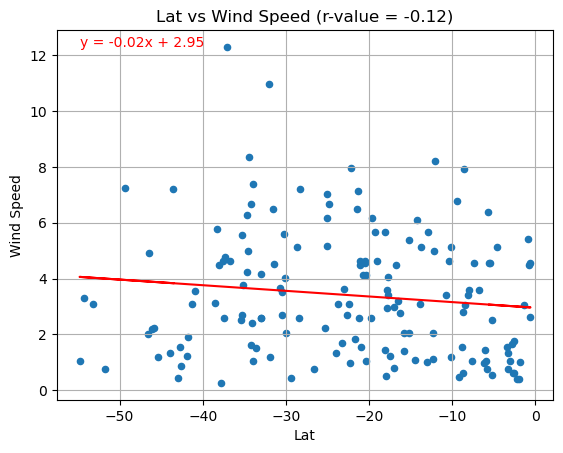

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
scatter_plot_with_regression(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE